# 可视化模型 graph

首先，我们需要 graphviz 包。也可以参考 graphviz [文档](https://graphviz.readthedocs.io/en/stable/manual.html)。

```bash
pip install -U graphviz
```

In [1]:
from yolort.models import yolov5s
from yolort.relay import get_trace_module

In [ ]:
model = yolov5s(pretrained=True)
tracing_module = get_trace_module(model)

In [3]:
print(tracing_module.code)

def forward(self,
    x: Tensor) -> Tuple[Tensor, Tensor, Tensor]:
  model = self.model
  _0, _1, _2, = (model).forward(x, )
  return (_0, _1, _2)



In [4]:
from yolort.relay.ir_visualizer import TorchScriptVisualizer

In [5]:
visualizer = TorchScriptVisualizer(tracing_module.model)

In [6]:
dot1 = visualizer.render(classes_to_visit={'YOLO', 'YOLOHead'})

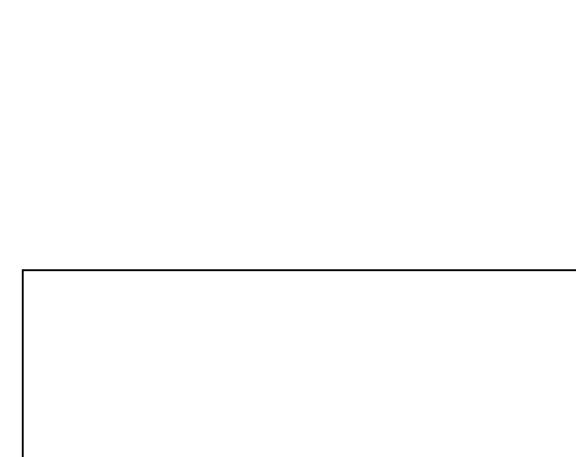

In [7]:
dot1

In [8]:
dot2 = visualizer.render(classes_to_visit={'YOLO', 'PostProcess'})

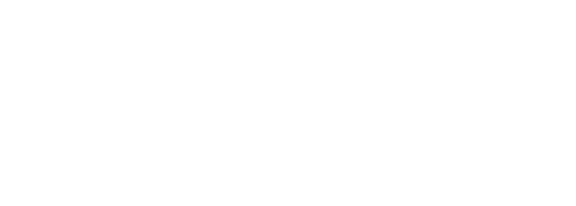

In [9]:
dot2